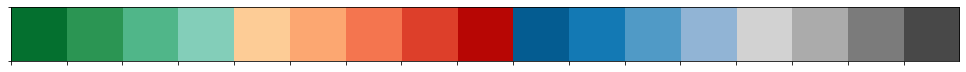

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
sns.set_palette(palette1)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling

# confirmed COVID-19 positive cases
conf = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").transpose()
# deceased cases
deaths = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv").transpose()
# recovery cases
recover = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv").transpose()

conf.head()

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
Province/State,NaN,NaN,NaN,NaN,NaN,British Columbia,New South Wales,Victoria,Queensland,NaN,...,NaN,Montserrat,NaN,Greenland,New Caledonia,Bermuda,NaN,NaN,NaN,NaN
Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
Lat,15,36,1.2833,28.1667,2.5,49.2827,-33.8688,-37.8136,-28.0167,11.55,...,13.4432,16.7425,25.0343,71.7069,-20.9043,32.3078,15.4542,13.7942,-17.7134,12.8654
Long,101,138,103.833,84.25,112.5,-123.121,151.209,144.963,153.4,104.917,...,-15.3101,-62.1874,-77.3963,-42.6043,165.618,-64.7505,18.7322,-88.8965,178.065,-85.2072
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assign second row as column names
conf.columns = conf.iloc[1]
deaths.columns = deaths.iloc[1]
recover.columns = recover.iloc[1]

In [4]:
# remove first 4 rows
conf = conf.iloc[4:]
deaths = deaths.iloc[4:]
recover = recover.iloc[4:]

In [5]:
# list contry names
# set(list(conf.columns.values))

In [6]:
# data are divided by province: sum provinces to obtain numbers by country
# China was not affected uniformly, therefore the population scaled numbers appear low (I will add the provence numbers lated)
conf = conf.groupby(by=conf.columns, axis=1).sum()
deaths = deaths.groupby(by=deaths.columns, axis=1).sum()
recover = recover.groupby(by=recover.columns, axis=1).sum()

In [7]:
# select only countries with > 900 positive COVID-19 cases
selected_columns = conf.max()>900
conf = conf.loc[:,selected_columns]
deaths = deaths.loc[:,selected_columns]
recover = recover.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

In [8]:
# latest number of cases by country
print(conf.max())

Country/Region
Austria            2013.0
Belgium            1795.0
China             81156.0
Denmark            1225.0
France            10947.0
Germany           15320.0
Iran              18407.0
Italy             41035.0
Japan               924.0
Korea, South       8565.0
Netherlands        2467.0
Norway             1746.0
Spain             17963.0
Sweden             1439.0
Switzerland        4075.0
US                13677.0
United Kingdom     2716.0
dtype: float64


In [9]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

Text(0, 0.5, 'Total number of positive COVID-19 cases (linear scale)')

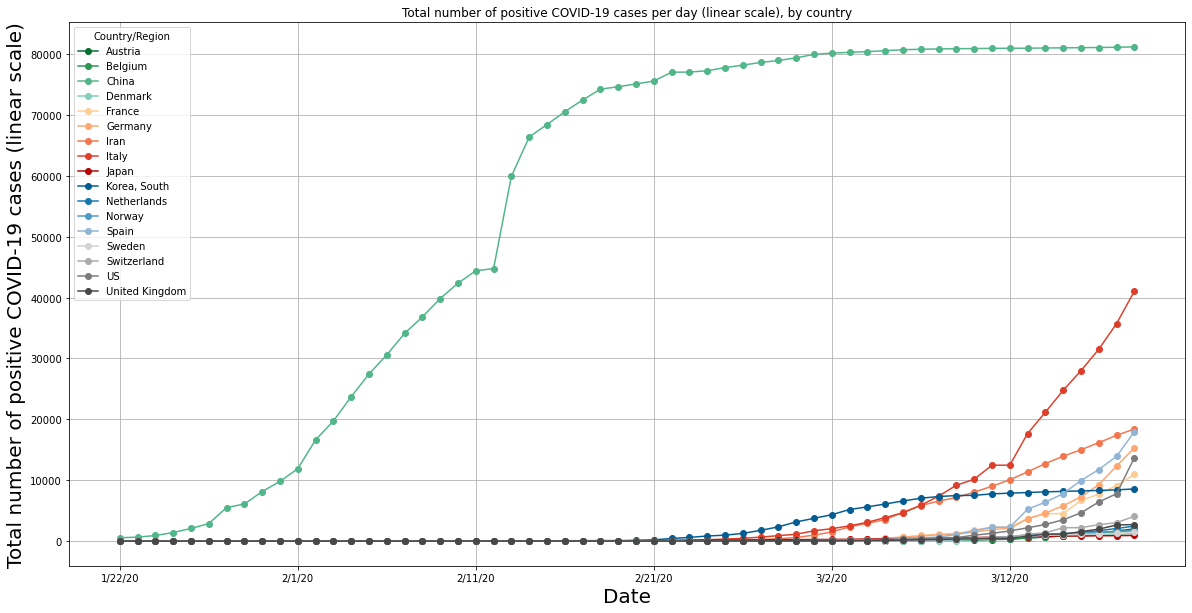

In [10]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (linear scale)", fontsize=20)

Text(0, 0.5, 'Total number of positive COVID-19 cases (log scale)')

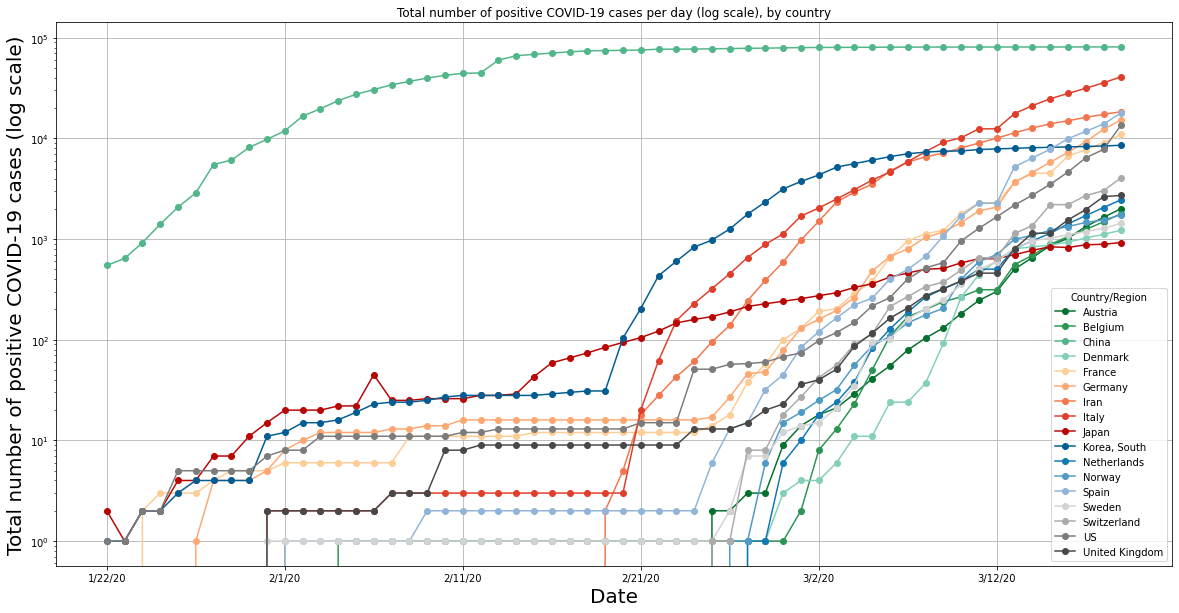

In [11]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (log scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (log scale)", fontsize=20)

Text(0, 0.5, 'Total number of COVID-19 death cases (linear scale)')

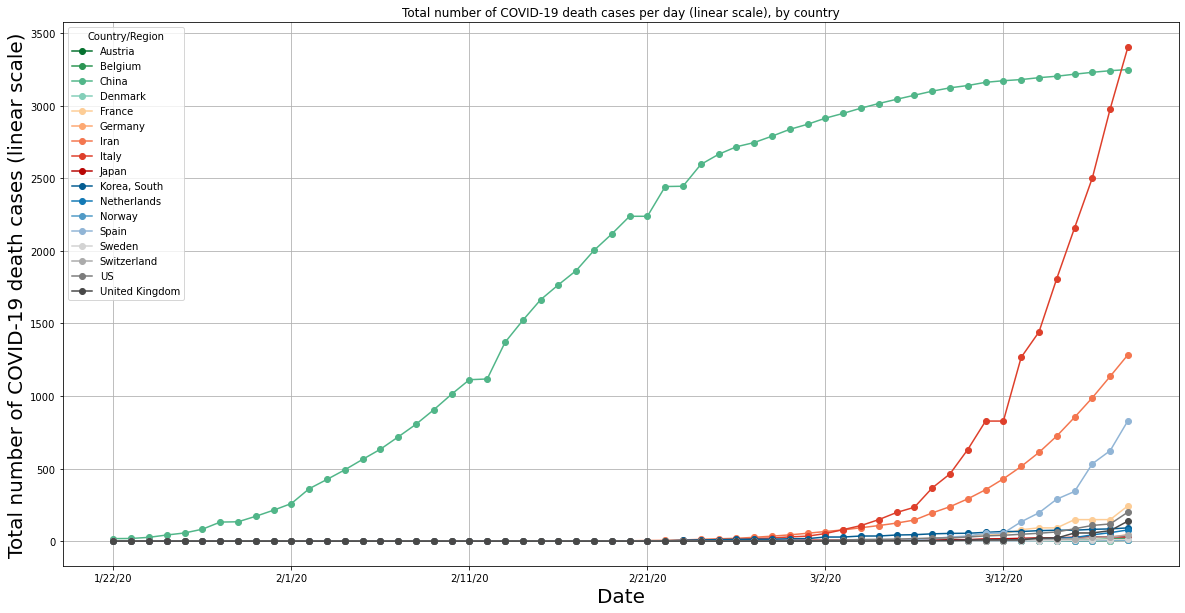

In [12]:
#show total number of positive cases
plot1 = deaths[deaths.columns.values].plot(grid=True, marker='o',
         title='Total number of COVID-19 death cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of COVID-19 death cases (linear scale)", fontsize=20)

(0.0, 0.15)

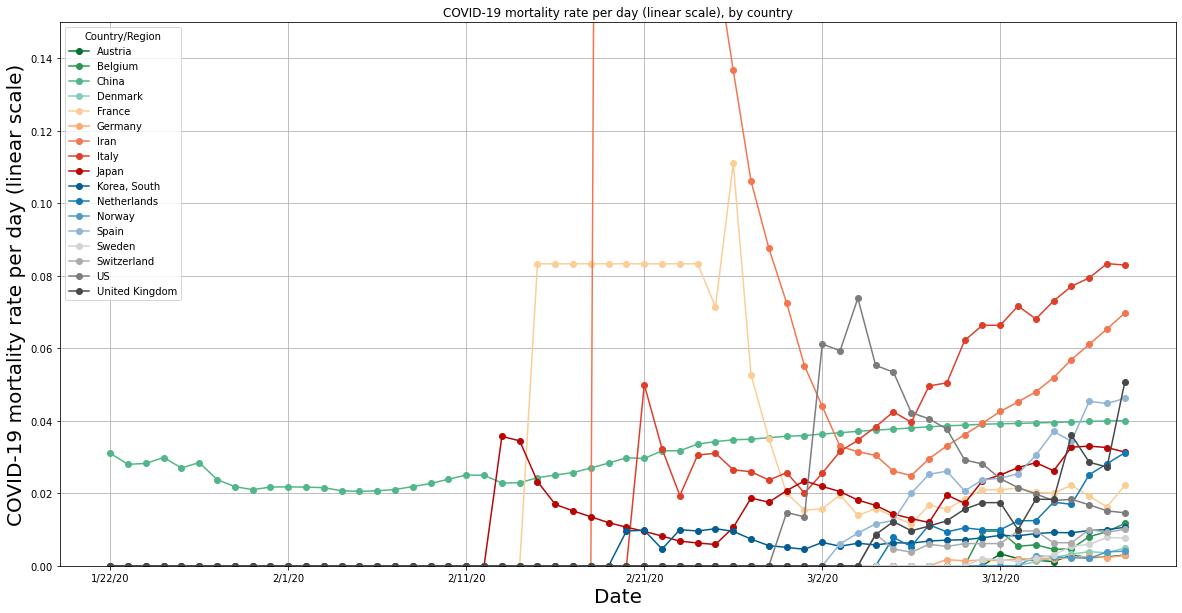

In [13]:
mortality = deaths.divide(conf.replace(0, 1))

#show total number of positive cases
plot1 = mortality[mortality.columns.values].plot(grid=True, marker='o',
         title='COVID-19 mortality rate per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 mortality rate per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.15)

In [14]:
# retrieve population information
# source https://population.un.org/wpp/Download/Standard/Population/
population = pd.read_csv("../external_data/WPP2019_TotalPopulationBySex.csv")

In [15]:
# select only country codes for year 2020, transpose and remove columns to make it similar to COVID-19 data
population = population[(population["Time"] == 2020) & (population["VarID"] == 2) & (population["LocID"] < 910)]
population = population[["Location","PopTotal"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()
# population numbers are expressed in 1e3

Location,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9


In [16]:
# list country names
# set(list(population.columns.values))

In [17]:
# rename population country names that don't match COVID-19 data
population = population.rename(columns={
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Brunei Darussalam': 'Brunei',
 'Congo (Kinshasa)': 'Congo',
 "Cote d'Ivoire":  "Côte d'Ivoire",
 'Iran (Islamic Republic of)':  'Iran',
 'Republic of Korea': 'Korea, South',
 'Republic of Moldova':  'Moldova',
 'Russian Federation':  'Russia',
 'China, Taiwan Province of China':  'Taiwan*',
 'United States of America':  'US',
 'Viet Nam':  'Vietnam'
    }
        )

In [18]:
# concatenate dataset
conf = pd.concat([population,conf])
conf.head()

,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Vietnam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# divide cases rows by population/10 row to obtain number of cases per 1e4 persons
conf = conf.loc[:].div(conf.iloc[0][:]/10)

In [20]:
# remove population row
conf = conf.iloc[1:]
conf.dropna(axis=1, inplace=True)
conf.tail()

,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,Japan,Netherlands,Norway,"Korea, South",Spain,Sweden,Switzerland,United Kingdom,US
3/15/20,0.954877,0.764477,0.562785,1.51065,0.69293,0.69166,1.65942,4.093,0.0663365,0.664143,2.25225,1.59199,1.66785,1.01195,2.542,0.168665,0.105709
3/16/20,1.13031,0.912886,0.562994,1.61079,1.02155,0.867947,1.78479,4.62771,0.0652295,0.826385,2.45885,1.60642,2.12641,1.09216,2.542,0.228471,0.139938
3/17/20,1.47895,1.07251,0.563167,1.76962,1.1795,1.10487,1.92504,5.21089,0.06942,0.998548,2.69864,1.62281,2.51268,1.1783,3.11972,0.288719,0.193986
3/18/20,1.82759,1.28218,0.563473,1.92673,1.3949,1.47128,2.06696,5.9067,0.0702898,1.20106,2.85912,1.64095,2.9751,1.26643,3.49871,0.389182,0.235134
3/19/20,2.23508,1.5488,0.563848,2.11491,1.6771,1.82851,2.19149,6.78693,0.0730571,1.43975,3.22066,1.67059,3.84196,1.42486,4.70847,0.400082,0.413199


Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (linear scale)")

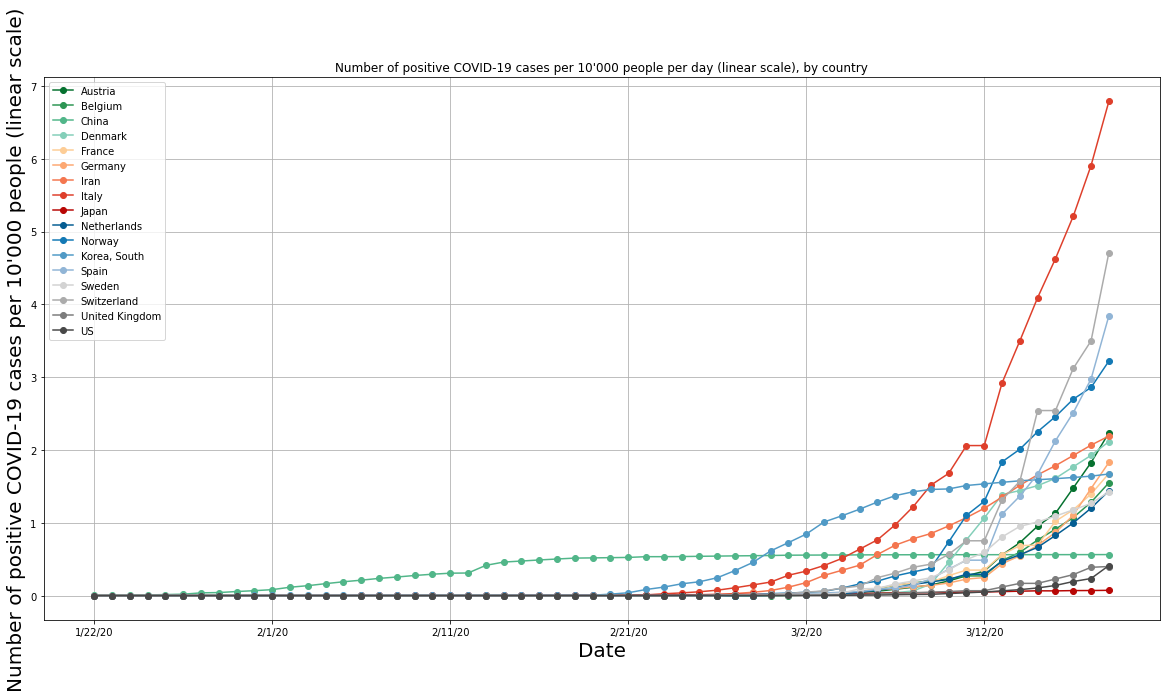

In [21]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (linear scale), by country", figsize = (20,10),)
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (linear scale)", fontsize=20)

Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (log scale)")

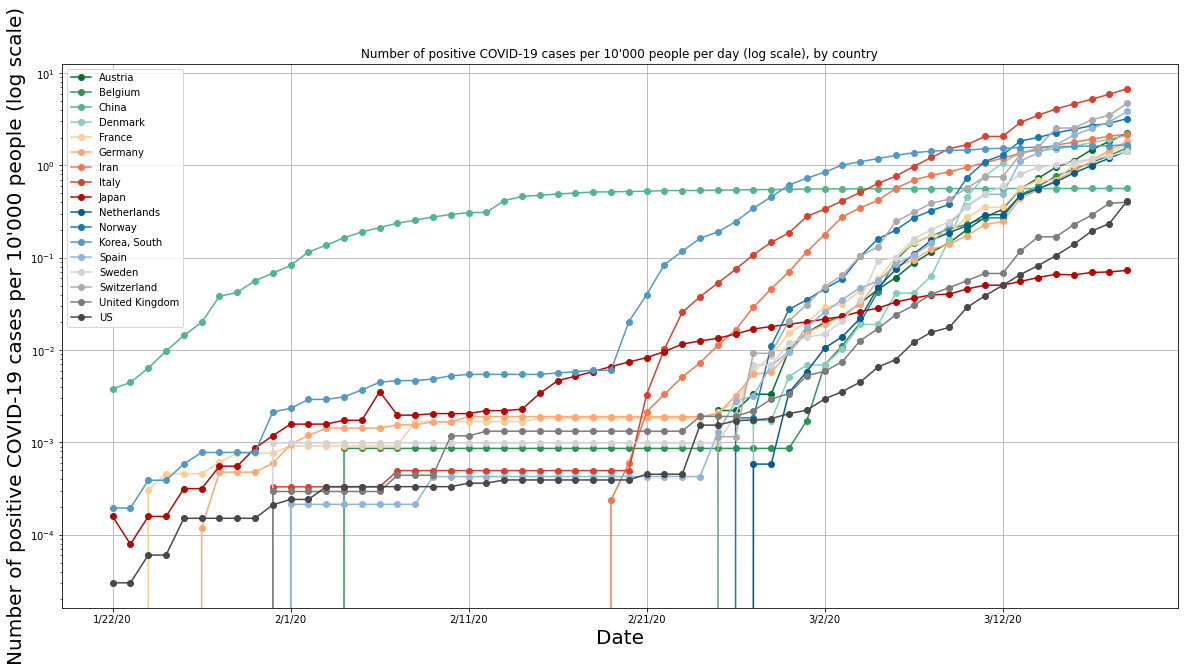

In [22]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (log scale), by country", figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (log scale)", fontsize=20)